In [ ]:
# 대구 역별일별시간별승하차인원현황(2025.01.31 기준!)

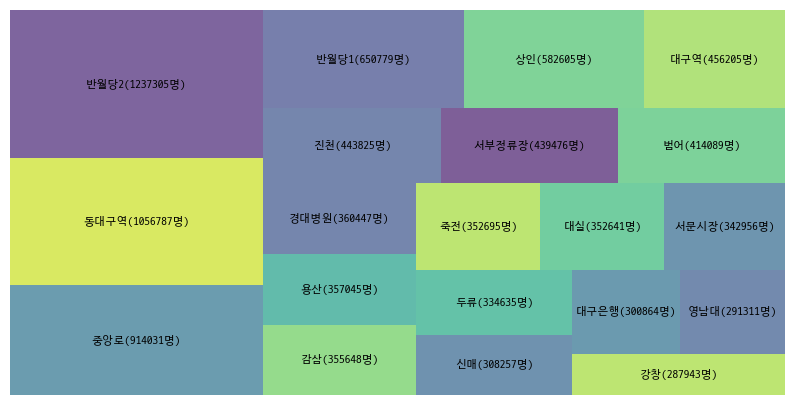

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path ="./D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"
file_path ="./대구교통공사_역별일별시간별승하차인원현황_20250131.csv"
data = pd.read_csv(file_path,encoding="EUC-KR")

columns = ['month','day','num','name','type']
time_col = [f"{i}~{i+1}H" for i in range(5,24)]
# time_col = ['1h-2h','2h-3h']
columns =columns + time_col + ['total']
data.columns = columns
data = data.loc[:,:'total']

data1 = data.groupby(['num','month','day','name']).sum().reset_index()

gdata = data1[['name','month','day','total']]
gdata = gdata.sort_values(by=['name','day'],ascending=[True,False])

mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]

sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]

import squarify
plt.figure(figsize=(10,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size']=7
plt.gca().invert_yaxis()
plt.axis("off") 
plt.show()